# MNIST-MLP demo

In [1]:
# https://github.com/fchollet/keras/blob/master/examples/mnist_mlp.py
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

Using TensorFlow backend.


In [24]:
batch_size = 128
num_classes = 10
epochs = 80

# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

60000 train samples
10000 test samples


In [25]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr_sgd = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-4)
reduce_lr_adam = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-5)

# 1. SGDW

In [3]:
from SGDW import SGDW

In [50]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGDW(weight_decay=0.001, momentum=0.9),
              metrics=['accuracy'])

history0 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, callbacks=[reduce_lr_sgd],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_58 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_39 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_59 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_40 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_60 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 52/80
60000/60000 [==============================] - 2s 36us/step - loss: 0.0087 - acc: 0.9983 - val_loss: 0.0494 - val_acc: 0.9854
Epoch 53/80
60000/60000 [==============================] - 2s 36us/step - loss: 0.0080 - acc: 0.9983 - val_loss: 0.0493 - val_acc: 0.9851
Epoch 54/80
60000/60000 [==============================] - 2s 36us/step - loss: 0.0080 - acc: 0.9986 - val_loss: 0.0495 - val_acc: 0.9852
Epoch 55/80
60000/60000 [==============================] - 2s 36us/step - loss: 0.0078 - acc: 0.9986 - val_loss: 0.0494 - val_acc: 0.9854
Epoch 56/80
60000/60000 [==============================] - 2s 36us/step - loss: 0.0079 - acc: 0.9984 - val_loss: 0.0493 - val_acc: 0.9853
Epoch 57/80
60000/60000 [==============================] - 2s 36us/step - loss: 0.0081 - acc: 0.9985 - val_loss: 0.0493 - val_acc: 0.9853
Epoch 58/80
60000/60000 [==============================] - 2s 36us/step - loss: 0.0080 - acc: 0.9986 - val_loss: 0.0490 - val_acc: 0.9853
Epoch 59/80
60000/60000 [=========

# 2. AdamW

In [28]:
from AdamW import AdamW

In [84]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=AdamW(weight_decay=1.1),
              metrics=['accuracy'])

history1 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, callbacks=[reduce_lr_adam],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_85 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_57 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_86 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_58 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_87 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 52/80
60000/60000 [==============================] - 3s 45us/step - loss: 0.0202 - acc: 0.9959 - val_loss: 0.0497 - val_acc: 0.9857
Epoch 53/80
60000/60000 [==============================] - 3s 45us/step - loss: 0.0200 - acc: 0.9959 - val_loss: 0.0470 - val_acc: 0.9855
Epoch 54/80
60000/60000 [==============================] - 3s 45us/step - loss: 0.0196 - acc: 0.9961 - val_loss: 0.0495 - val_acc: 0.9843
Epoch 55/80
60000/60000 [==============================] - 3s 45us/step - loss: 0.0160 - acc: 0.9977 - val_loss: 0.0475 - val_acc: 0.9853
Epoch 56/80
60000/60000 [==============================] - 3s 45us/step - loss: 0.0160 - acc: 0.9974 - val_loss: 0.0477 - val_acc: 0.9856
Epoch 57/80
60000/60000 [==============================] - 3s 45us/step - loss: 0.0158 - acc: 0.9975 - val_loss: 0.0470 - val_acc: 0.9852
Epoch 58/80
60000/60000 [==============================] - 3s 45us/step - loss: 0.0156 - acc: 0.9975 - val_loss: 0.0472 - val_acc: 0.9852
Epoch 59/80
60000/60000 [=========

# 3. SGD

In [32]:
from keras.optimizers import SGD

In [33]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(momentum=0.9),
              metrics=['accuracy'])

history2 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, callbacks=[reduce_lr_sgd],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_16 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_46 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_31 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_47 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_32 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_48 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

Epoch 52/80
60000/60000 [==============================] - 2s 34us/step - loss: 0.0088 - acc: 0.9981 - val_loss: 0.0519 - val_acc: 0.9842
Epoch 53/80
60000/60000 [==============================] - 2s 35us/step - loss: 0.0084 - acc: 0.9981 - val_loss: 0.0519 - val_acc: 0.9841
Epoch 54/80
60000/60000 [==============================] - 2s 35us/step - loss: 0.0092 - acc: 0.9975 - val_loss: 0.0519 - val_acc: 0.9841
Epoch 55/80
60000/60000 [==============================] - 2s 34us/step - loss: 0.0087 - acc: 0.9979 - val_loss: 0.0521 - val_acc: 0.9842
Epoch 56/80
60000/60000 [==============================] - 2s 35us/step - loss: 0.0084 - acc: 0.9980 - val_loss: 0.0519 - val_acc: 0.9841
Epoch 57/80
60000/60000 [==============================] - 2s 34us/step - loss: 0.0090 - acc: 0.9979 - val_loss: 0.0519 - val_acc: 0.9841
Epoch 58/80
60000/60000 [==============================] - 2s 34us/step - loss: 0.0088 - acc: 0.9979 - val_loss: 0.0520 - val_acc: 0.9841
Epoch 59/80
60000/60000 [=========

# 4. Adam

In [34]:
from keras.optimizers import Adam

In [35]:
model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history3 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, callbacks=[reduce_lr_adam],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_17 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_49 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_33 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_50 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_34 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_51 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

# 5. Adam w/ L2(3e-5)

In [ ]:
from keras.layers import *

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu', input_shape=(784,), kernel_regularizer=regularizers.l2(3e-5)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(3e-5)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

history4 = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1, callbacks=[reduce_lr_adam],
                    validation_data=(x_test, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_32 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_88 (Dense)             (None, 512)               401920    
_________________________________________________________________
dropout_59 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_89 (Dense)             (None, 512)               262656    
_________________________________________________________________
dropout_60 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_90 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________
Trai

# Plot results

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [97]:
def plot_history(hists, attribute='val_loss', axis=(-1,81,0.85,0.99), loc='lower right'):
    ylabel = {'oss': 'loss', 'acc': 'accuracy'}
    title = {'val_loss': 'valid. loss', 'loss': 'trn. loss', 'val_acc': 'valid. accuracy', 'acc': 'trn._ accuracy'}
    num_hists = len(hists)
    
    plt.figure(figsize=(6, 4))  
    plt.axis(axis)
    for i in range(num_hists):
        plt.plot(hists[i].history[attribute])
    plt.title(title[attribute])  
    plt.ylabel(ylabel[attribute[-3:]])  
    plt.xlabel('epoch')  
    plt.legend(['SGDW', 'AdamW', 'SGD', 'Adam', 'Adam(L2=3e-5)'], loc=loc)  

    plt.show()

In [98]:
hists = [history0, history1, history2, history3, history4]

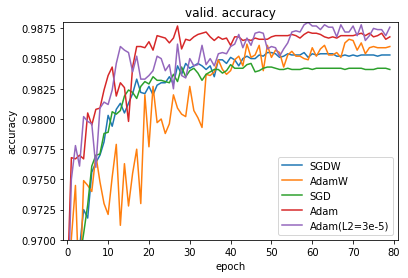

In [99]:
plot_history(hists, attribute='val_acc', axis=(-1,81,0.97,0.988), loc='lower right')

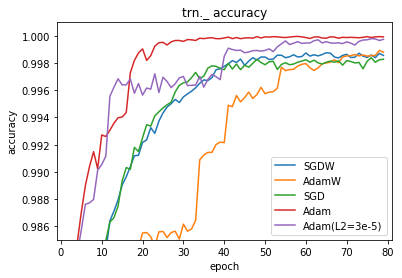

In [100]:
plot_history(hists, attribute='acc', axis=(-1,81,0.985,1.001), loc='lower right')

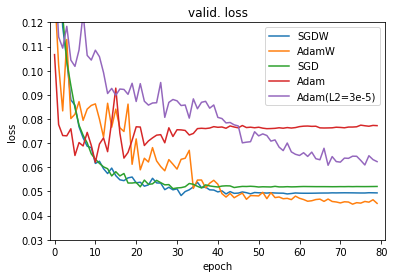

In [101]:
plot_history(hists, attribute='val_loss', axis=(-1,81,0.03,0.12), loc='upper right')

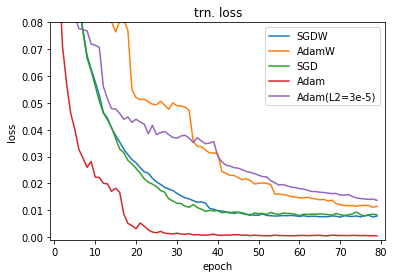

In [102]:
plot_history(hists, attribute='loss', axis=(-1,81,-0.001,0.08), loc='upper right')